In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [3]:
graph = nx.read_gml('lesmiserables.gml')

In [4]:
#graph.nodes(data=True)
#graph.edges(data=True)

In [5]:
edge_values = [d['value'] for _, _, d in graph.edges(data=True)]
edge_widths = [v / max(edge_values) * 8 for v in edge_values]

In [6]:
#plt.hist(edge_values, bins=30)
#plt.show()

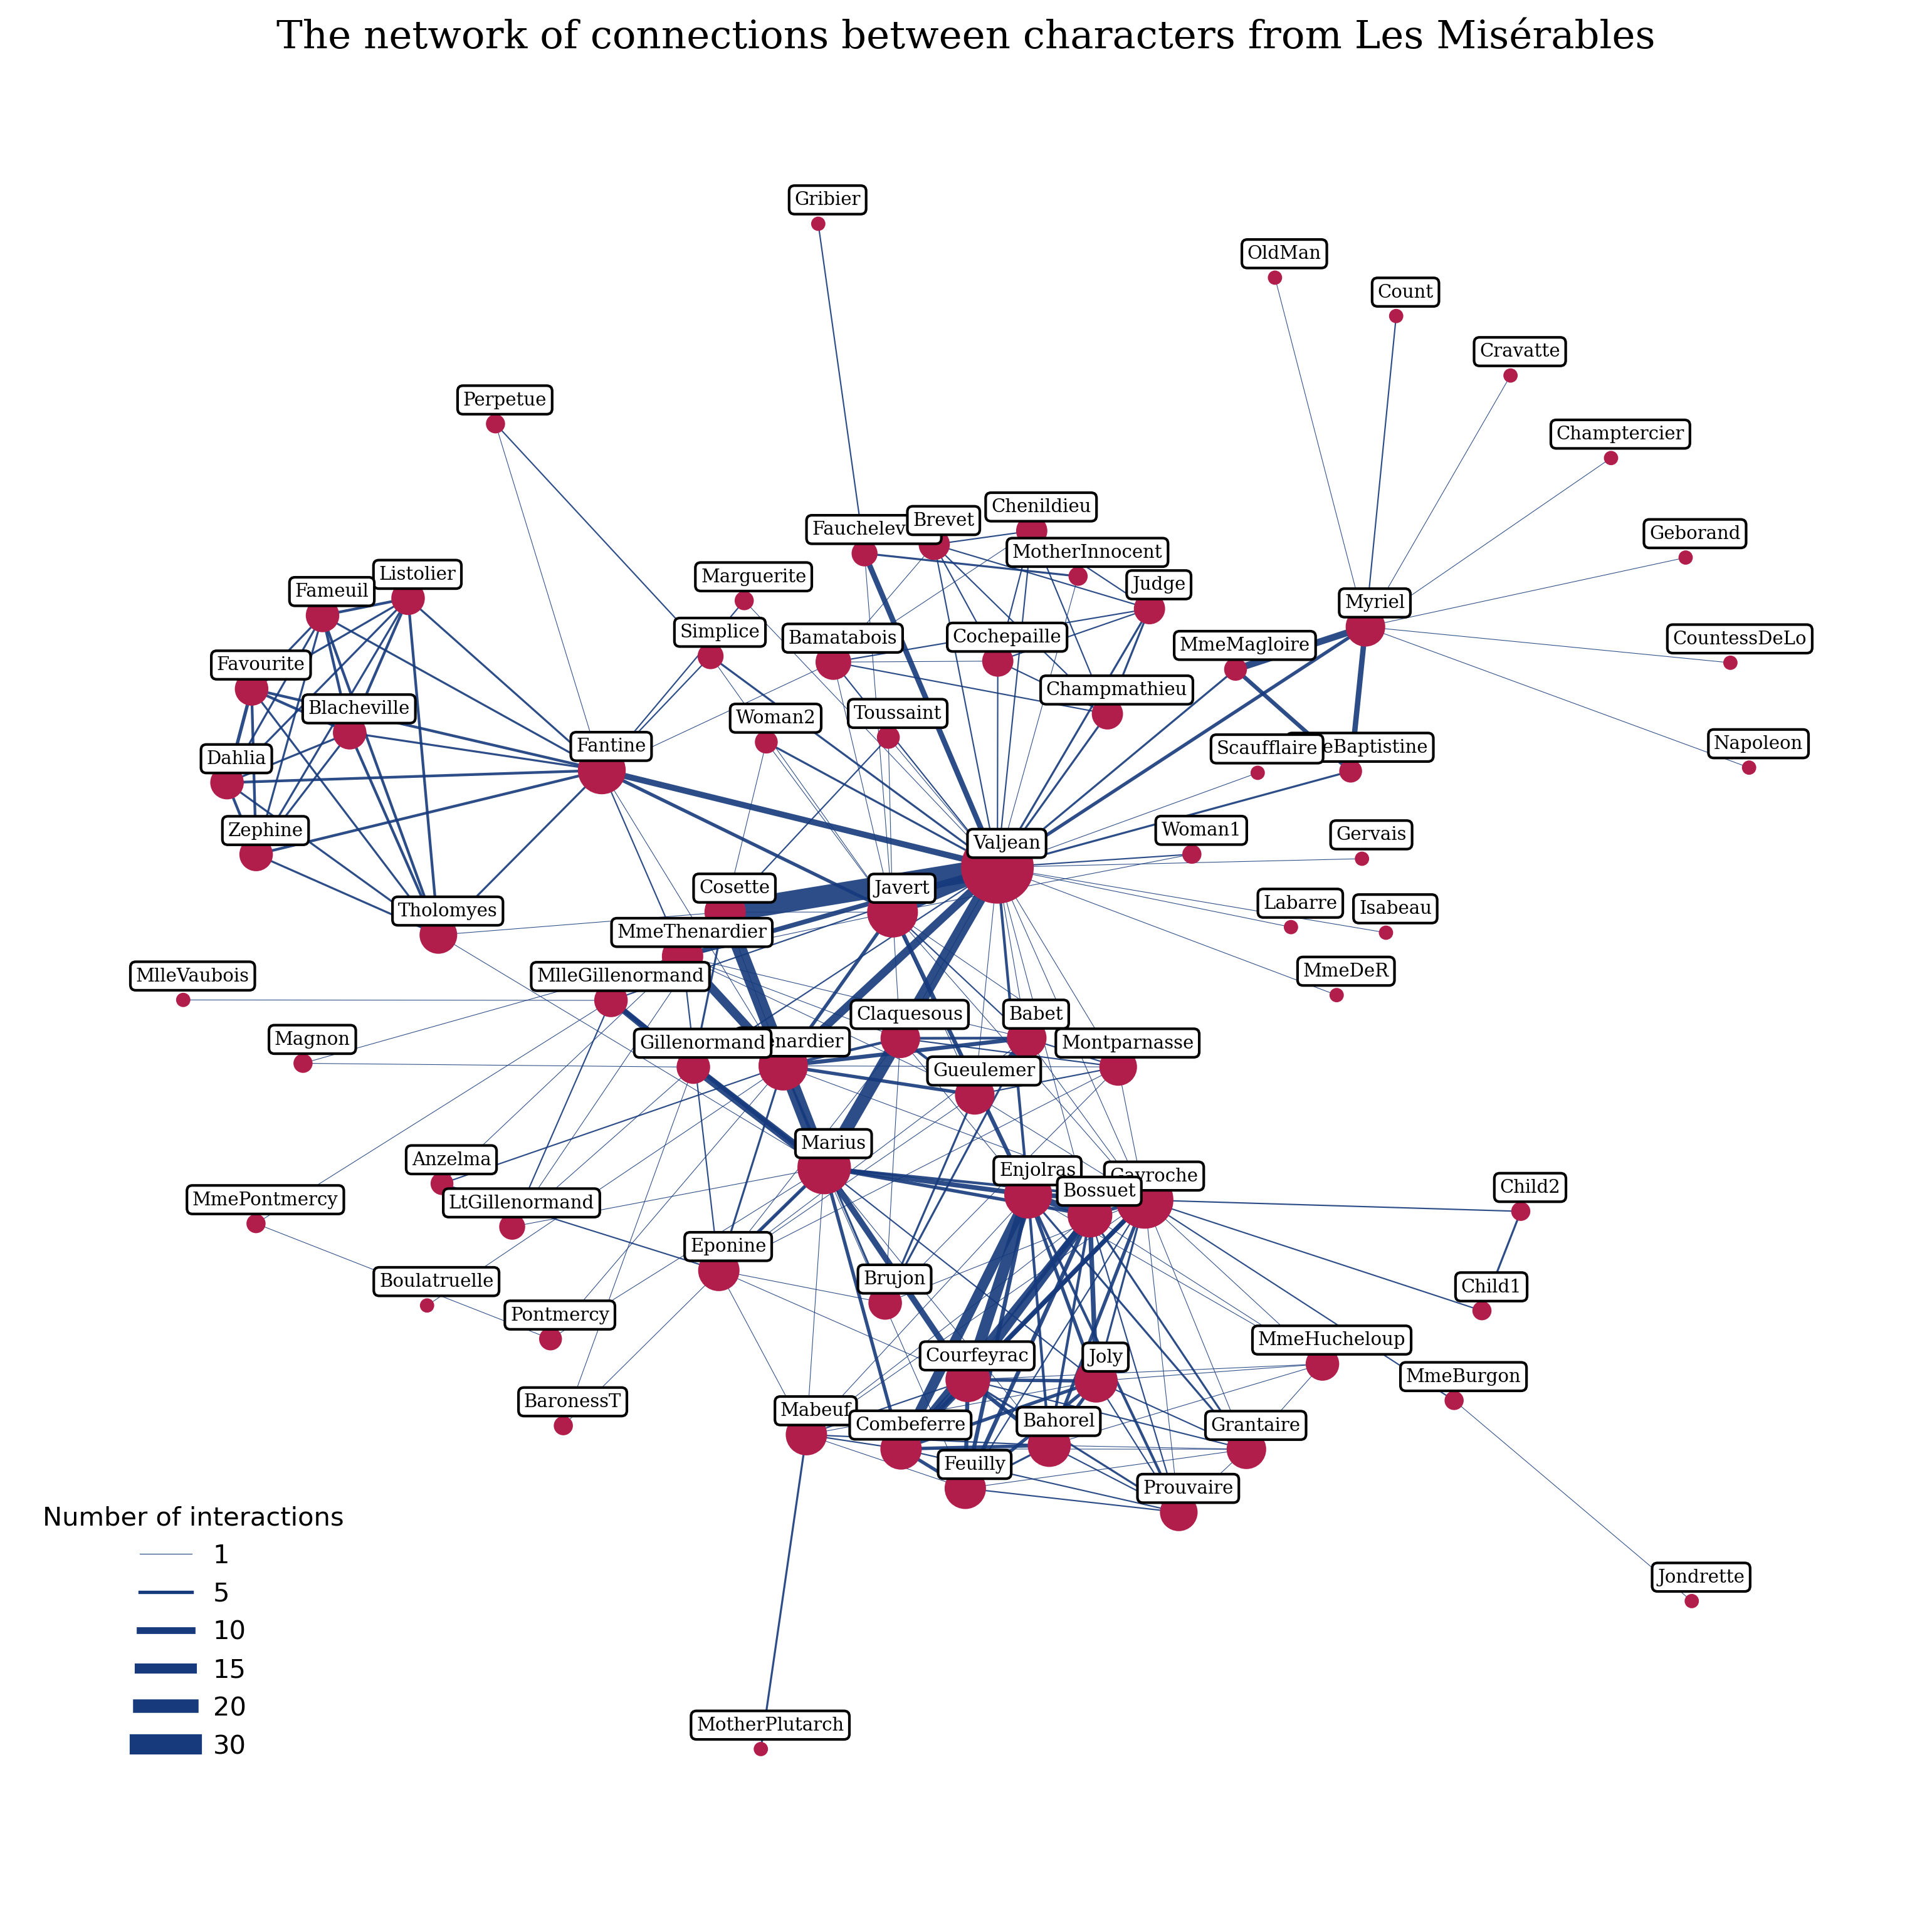

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13), dpi = 300)

ax.set_title("The network of connections between characters from Les Misérables", fontsize = 15, fontfamily = "serif")

pos = nx.kamada_kawai_layout(graph)


node_degrees = dict(graph.degree)
node_sizes = [v * 20 for v in node_degrees.values()]

nx.draw_networkx_nodes(
    graph, 
    pos = pos, 
    node_size = node_sizes,
    node_color = "#B21E4C", 
    ax = ax
)

nx.draw_networkx_edges(
    graph,
    pos =  pos,
    width = edge_widths,
    edge_color = "#163A7B",
    alpha = 0.9,
    ax = ax,
)

node_labels = {node: node for node in graph}
label_pos = {k: (v[0] + 0.01, v[1] + 0.03) for k, v in pos.items()}
             
nx.draw_networkx_labels(
    graph,
    pos = label_pos,
    labels = node_labels,
    font_color = "black",
    font_family = "serif",
    font_size = 7,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
    ax = ax,
)


value = [1, 5, 10, 15, 20, 30]
ax.legend(
    handles=[mpl.lines.Line2D([], [], color="#163A7B", linewidth= (e / max(edge_values) * 8)) for e in value],
    labels=list(value),
    loc = "center left", 
    bbox_to_anchor=(0, 0.15),
    frameon=False,
    title="Number of interactions",
)

plt.axis("off")
plt.savefig('network.jpg', format='jpg')
plt.show()

Powyższy graf przedstawia liczbę interakcji pomiędzy postaciami powieści Wiktora Hugo pt. "Nędnicy". Poszczególne postacie są połączone krawędzią, jeżeli pojawiły się w jednym rozdziale ksiązki, grubość krawędzi odpowiada liczbie takich interakcji, którą miały ze sobą połączone postacie. Wielkość wierzchołka odpowiada ilości różnych osób, z którymi dana postać weszła w interakcjię. Wierzhołki są rozmieszczone zgodnie z algorytmem Kamady-Kawai, aby podpisy wierzchołków były czytelne umieszczone zostały w ramkach i zostały przesunięte, aby nie zasłaniać samych wierzchołków. 